# Домашнее задание: Снижение размерности. KernelPCA, t-SNE/UMAP

## 1. Загрузка данных и предварительная обработка

In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import KernelPCA
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Загрузка данных
df = pd.read_csv("penguins.csv")

# Удаление строк с пропущенными значениями
imputer = SimpleImputer(strategy="median")
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

# Кодирование категориального признака 'sex'
df = pd.get_dummies(df, columns=['sex'], drop_first=True)

# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Вывод первых строк обработанных данных
df.head()


/Users/admin/Desktop/inno_ml/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.10,18.7,181.0,3750.0,False,True
1,39.50,17.4,186.0,3800.0,True,False
2,40.30,18.0,195.0,3250.0,True,False
3,44.45,17.3,197.0,4050.0,False,False
4,36.70,19.3,193.0,3450.0,True,False


## 2. Kernel PCA с разными ядрами

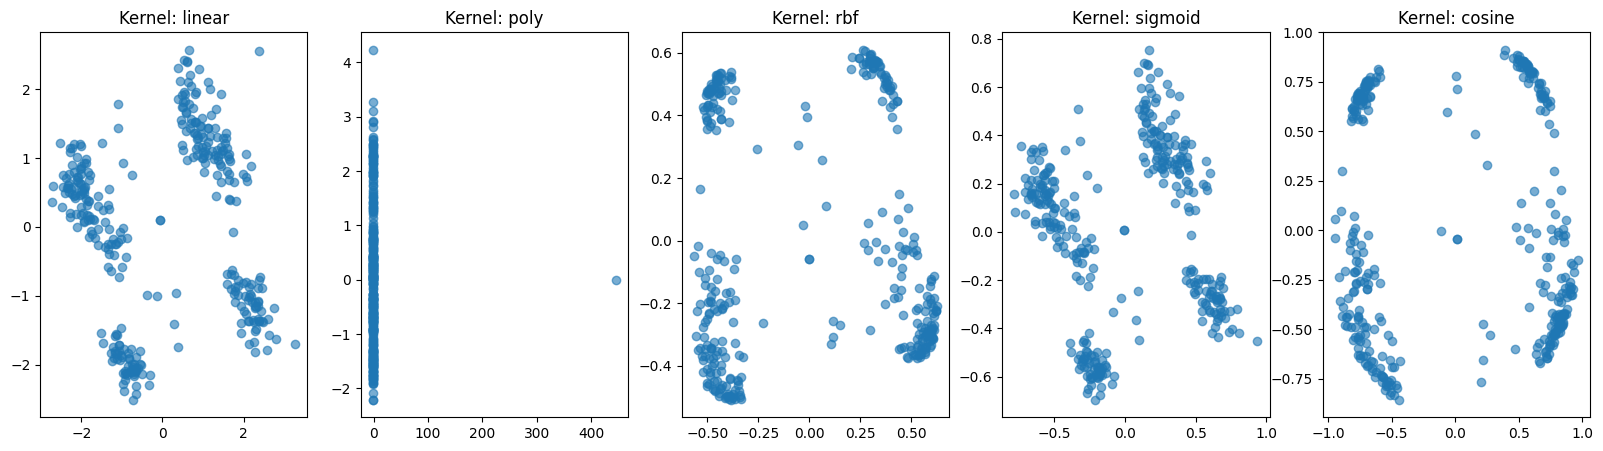

In [9]:

# Применение Kernel PCA с разными ядрами
kernels = ['linear', 'poly', 'rbf', 'sigmoid', 'cosine']
kpca_results = {}

for kernel in kernels:
    kpca = KernelPCA(n_components=2, kernel=kernel)
    reduced_data = kpca.fit_transform(scaled_data)
    kpca_results[kernel] = reduced_data

# Визуализация результатов Kernel PCA
fig, axes = plt.subplots(1, len(kernels), figsize=(20, 5))
for ax, (kernel, data) in zip(axes, kpca_results.items()):
    ax.scatter(data[:, 0], data[:, 1], alpha=0.6)
    ax.set_title(f'Kernel: {kernel}')
plt.show()


## 3. Анализ дисперсии для линейного ядра

In [10]:

# Анализ дисперсии для линейного ядра
kpca_linear = KernelPCA(n_components=2, kernel='linear', fit_inverse_transform=True)
X_kpca = kpca_linear.fit_transform(scaled_data)

# Вычисление lost_variance
explained_variance = np.var(X_kpca, axis=0)
total_variance = np.var(scaled_data, axis=0).sum()
lost_variance = 1 - explained_variance.sum() / total_variance

lost_variance


np.float64(0.28853870687299066)

## 4. Применение UMAP для сравнения

/Users/admin/Desktop/inno_ml/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/admin/Desktop/inno_ml/venv/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


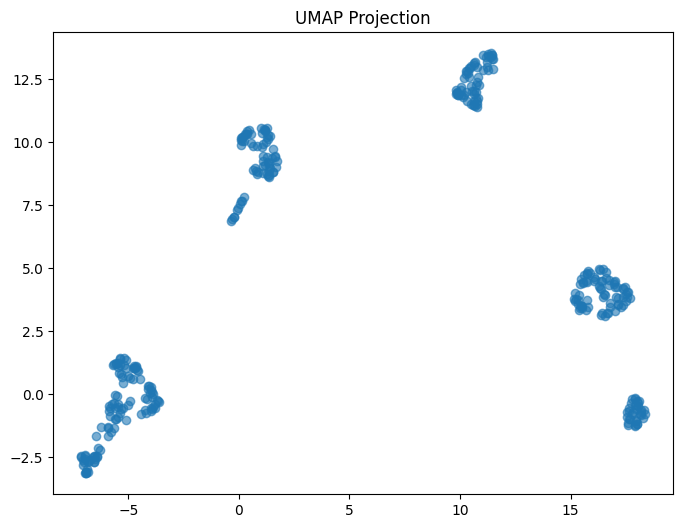

In [11]:

# Применение UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(scaled_data)

# Визуализация результатов UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6)
plt.title("UMAP Projection")
plt.show()
